# --- SOLUTION ---

HINT: These solutions only give an impression on how the problems can be tackled. They are neither the best possible solutions nor are they always complete. You are invited to find approaches that outperform those given in the solutions and present them to your fellow students.

# Exercise 6: Anomaly Detection

In this exercise we will focus on anomaly detection. To get familiar with anomaly detection in scikit-learn, refer to the respective [part in the documentation](https://scikit-learn.org/stable/modules/outlier_detection.html).

## Task 1: Get to know the techniques
In this task we use an artifical data set with only two features to experiment with anomaly detection techniques. In addition to the "correct" data points that form clusters, there are 27 random data points. Use the techniques from scikit-learn to spot the outliers.
- Visualise and inspect the data. Can you already see the outliers?
- Use the following techniques to spot outliers and visualise the result: LocalOutlierFactor, OneClassSVM, IsolationForest

In [1]:
# use the following command to run the notebook without any warnings:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('artificial.txt', '\t').drop(columns='ID')

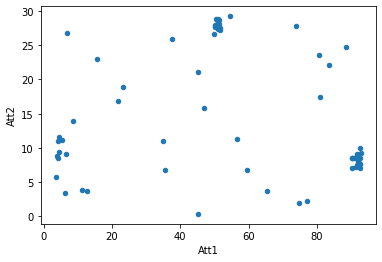

In [3]:
# Visualise the data with a scatter plot. Can you spot the outliers?

# --- SOLUTION ---
df.plot.scatter(x='Att1', y='Att2')
plt.show()

--- BASIC ESTIMATORS ---


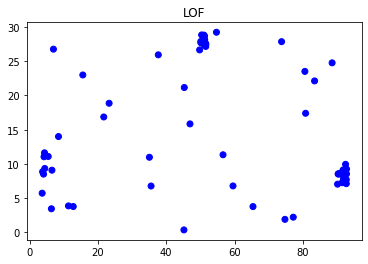

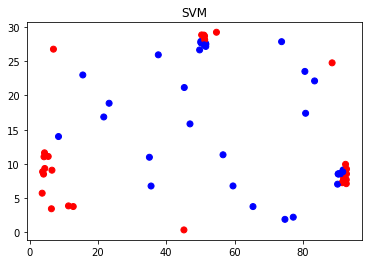

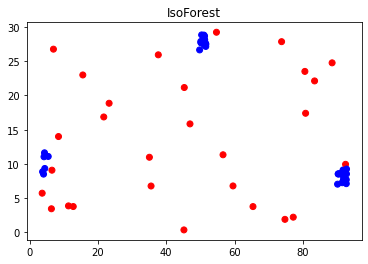


--- TUNED ESTIMATORS ---


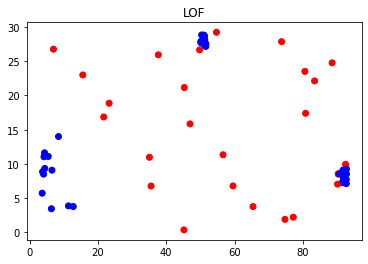

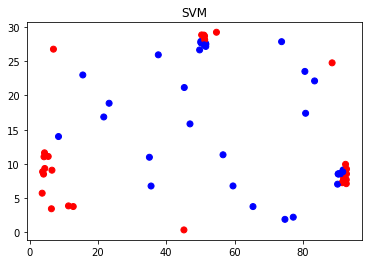

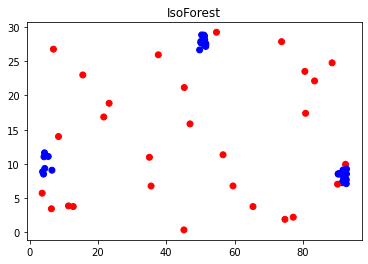

In [4]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

# Use the anomaly detection methods of scikit-learn to automatically detect the outliers.
# You might want to vary the parameters of the techniques for better results. Visualise the results!

# --- SOLUTION ---
estimators = {'LOF': LocalOutlierFactor(), 'SVM': OneClassSVM(), 'IsoForest': IsolationForest()}
estimators_tuned = {
    'LOF': LocalOutlierFactor(n_neighbors=10, contamination=.4),
    'SVM': OneClassSVM(gamma='scale'),
    'IsoForest': IsolationForest(contamination='auto', behaviour='new')
}

def tag_outliers(df, estimator):
    return df.assign(status=np.array(['inlier' if x == 1 else 'outlier' for x in estimator.fit_predict(df)]))

def visualise_outliers(df, e, e_name):
    df = tag_outliers(df, e)
    plt.scatter(x=df['Att1'], y=df['Att2'], c=['Blue' if s == 'inlier' else 'Red' for s in df['status']])
    plt.title(e_name)
    plt.show()

print('--- BASIC ESTIMATORS ---')
for e_name, e in estimators.items():
    visualise_outliers(df, e, e_name)
    
print()
print('--- TUNED ESTIMATORS ---')
for e_name, e in estimators_tuned.items():
    visualise_outliers(df, e, e_name)
    

Conclusion: IsolationForest works best (at least for this artificial problem) and does not even need much tuning to perform well.

## Task 2: Evaluation of anomaly detection

In this task we work with a data set about breast cancer. It contains various features from cancer diagnostics. The majority of the data set is obtained from non-cancer patients (label 'B'), and 20 examples are obtained from patients where a cancer is present (label 'M'). Because of their low frequency, the cancer examples can be treated as outliers and we can use the previously mentioned techniques to detect them.

- Apply the techniques learned in the previous task to this data set.
- Use a ROC-curve to visualise the performance of every technique (outliers should be treated as the 'true' class).

In [5]:
df = pd.read_csv('breast_cancer_outliers.csv', sep=';').drop(columns='id')
X, y = df.drop(columns='class'), df['class']

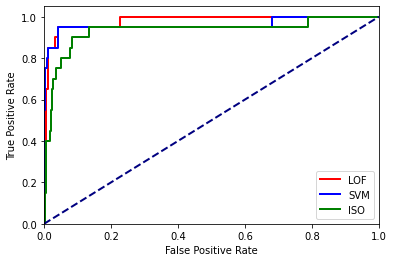

In [6]:
# Apply the anomaly detection techniques and draw a ROC-curve of their performance.
# How to work with ROC-curves in scikit-learn: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

# --- SOLUTION ---
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelBinarizer

y_actual = LabelBinarizer().fit_transform(y)
estimates = []

# LOF
lof_score = LocalOutlierFactor().fit(X).negative_outlier_factor_ * -1
estimates.append({'name': 'LOF', 'score': lof_score, 'color': 'Red'})

# SVM
svm_score = OneClassSVM(gamma='scale').fit(X).score_samples(X) * -1
estimates.append({'name': 'SVM', 'score': svm_score, 'color': 'Blue'})

# IsoForest
iso_score = IsolationForest().fit(X).score_samples(X) * -1
estimates.append({'name': 'ISO', 'score': iso_score, 'color': 'Green'})

plt.figure()
for e in estimates:
    fpr, tpr, _ = roc_curve(y_actual, e['score'])
    plt.plot(fpr, tpr, color=e['color'], lw=2, label=e['name'])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


Conclusion: LOF and SVM perform very well. ISO performs a little bit worse but still reasonably good.

## Task 3: Anomaly detection for preprocessing

We want to use anomaly detection to ignore outliers during training of a classifier in order to improve its performance. We use an alternative version of the Iris data set where some errors happened during data entry. After learning a simple classifier for the task, we try to improve it by removing outliers (to simplify the task, outliers are marked in the training set).

- Train a decision tree classifier on the training set and evaluate its performance on the test set
- Try to improve the performance by removing outliers during the _training phase_

In [7]:
df_train = pd.read_csv('iris_shuffled_train.csv', sep=';').drop(columns='id')
X_train, y_train = df_train.drop(columns=['label', 'is_outlier']), df_train['label']
df_test = pd.read_csv('iris_shuffled_test.csv', sep=';').drop(columns='id')
X_test, y_test = df_test.drop(columns='label'), df_test['label']

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Complete this function which trains a decision tree on the training set and evaluates it on the test set

def evaluate_decision_tree(X_train: pd.DataFrame, y_train: pd.Series, X_test: pd.DataFrame, y_test: pd.Series):
    # --- SOLUTION ---
    y_pred = DecisionTreeClassifier(random_state=42).fit(X_train, y_train).predict(X_test)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')
    print(f'Performance-Scores: P={precision:.2f} R={recall:.2f} F1={f1:.2f}')

evaluate_decision_tree(X_train, y_train, X_test, y_test)

Performance-Scores: P=0.62 R=0.62 F1=0.62


In [9]:
# Now change df_train by removing outliers with the techniques given in the previous tasks. Does this improve the results?

# --- SOLUTION ---
from numpy import linspace
for contamination in linspace(.1, .5, 5):
    print()
    print(f'=== CONTAMINATION {contamination:.1f} ===')
    
    print('--- LOF ---')
    outlier_mask_LOF = LocalOutlierFactor(contamination=contamination).fit_predict(X_train) == 1
    evaluate_decision_tree(X_train[outlier_mask_LOF], y_train[outlier_mask_LOF], X_test, y_test)
    
    print('--- ISO ---')
    outlier_mask_ISO = IsolationForest(behaviour='new', contamination=contamination).fit_predict(X_train) == 1
    evaluate_decision_tree(X_train[outlier_mask_ISO], y_train[outlier_mask_ISO], X_test, y_test)

print()
print('=== SVM ===')
outlier_mask_SVM = OneClassSVM(gamma='scale').fit_predict(X_train) == 1
evaluate_decision_tree(X_train[outlier_mask_SVM], y_train[outlier_mask_SVM], X_test, y_test)
    


=== CONTAMINATION 0.1 ===
--- LOF ---
Performance-Scores: P=0.71 R=0.71 F1=0.71
--- ISO ---
Performance-Scores: P=0.62 R=0.62 F1=0.62

=== CONTAMINATION 0.2 ===
--- LOF ---
Performance-Scores: P=0.71 R=0.71 F1=0.71
--- ISO ---
Performance-Scores: P=0.60 R=0.60 F1=0.60

=== CONTAMINATION 0.3 ===
--- LOF ---
Performance-Scores: P=1.00 R=1.00 F1=1.00
--- ISO ---
Performance-Scores: P=0.98 R=0.98 F1=0.98

=== CONTAMINATION 0.4 ===
--- LOF ---
Performance-Scores: P=0.98 R=0.98 F1=0.98
--- ISO ---
Performance-Scores: P=0.98 R=0.98 F1=0.98

=== CONTAMINATION 0.5 ===
--- LOF ---
Performance-Scores: P=0.98 R=0.98 F1=0.98
--- ISO ---
Performance-Scores: P=0.98 R=0.98 F1=0.98

=== SVM ===
Performance-Scores: P=0.89 R=0.89 F1=0.89


Conclusion: Removal of outliers can improve the classification performance.

## Task 4: Learn to recognise what you know!

In this final task, we assume that our training data does not have any outliers. We thus want to learn a model that represents this data as good as possible in order to find outliers in the test data set. We apply a one-class SVM to the Shuttle data set.

- Load the data from `shuttle_train.csv` (use a sample of 5,000 to reduce the runtime) and `shuttle_test.csv`
- Learn a one-class SVM that represents the training data as good as possible (you can use cross-validation to evaluate your model)
- Apply your model to the test data which contains outliers. Are you satisfied with the performance?

In [10]:
# Import the data set

# --- SOLUTION ---
df_train = pd.read_csv('shuttle_train.csv', sep=';').sample(n=5000)
X_train, y_train = df_train.drop(columns='anomaly'), df_train['anomaly']
y_train = pd.Series([1 if x == 'no' else 0 for x in y_train])

df_test = pd.read_csv('shuttle_test.csv', sep=';')
X_test, y_test = df_test.drop(columns='anomaly'), df_test['anomaly']
y_test = pd.Series([1 if x == 'no' else 0 for x in y_test])

In [11]:
# Learn a one-class SVM model for the training data and evaluate its performance

# --- SOLUTION ---
from sklearn.model_selection import cross_validate

result = cross_validate(OneClassSVM(gamma='auto'), X_train, y_train, scoring=['precision', 'recall', 'f1'], cv=10)
precision, recall, f1 = (np.mean(result[x]) for x in ['test_precision', 'test_recall', 'test_f1'])
print(f'P={precision:.2f} R={recall:.2f} F1={f1:.2f}')

P=1.00 R=0.22 F1=0.36


In [12]:
# Apply your model to the test data to find the outliers

# --- SOLUTION ---
y_pred = OneClassSVM(gamma='auto').fit(X_train, y_train).predict(X_test)
y_pred = np.array([1 if x == 1 else 0 for x in y_pred])  # converting the prediction to the binary class format

print('--- Score: Inliers ---')
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'P={precision:.2f} R={recall:.2f} F1={f1:.2f}')

print()
print('--- Score: Outliers ---')
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1 = f1_score(y_test, y_pred, pos_label=0)
print(f'P={precision:.2f} R={recall:.2f} F1={f1:.2f}')

--- Score: Inliers ---
P=1.00 R=0.23 F1=0.37

--- Score: Outliers ---
P=0.01 R=1.00 F1=0.01


Conclusion: On the one hand, we can be satisfied with the solution as no outliers are tagged as inliers. On the other hand, we have the problem of loosing way too much data because many inliers are tagged as outliers. Tuning the SVM might increase the performance of the tagging.